qiskit_runtime_service.__init__:WARNING:2025-12-21 00:58:56,750: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: dotnanimoe. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


Deutsch-Jozsa Algorithm - 3 큐비트
입력 공간 크기: 2^4 = 16가지
고전 컴퓨터 최악: 9번 호출 필요
양자 컴퓨터: 1번 호출로 해결!

 Oracel 타입 선택:
   - 'constant_0': 항상 0 반환
   - 'constant_1': 항상 1 반환
   - 'balanced': 절반은 0, 절반은 1

 Oracle: balanced

생성된 양자 회로:
           ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░───■──────────────────░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░   │                  ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░───┼────■─────────────░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░   │    │             ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░───┼────┼────■────────░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░   │    │    │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░───┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════╩══╩══╩══

qiskit_runtime_service.backends:WARNING:2025-12-21 00:58:57,731: Loading instance: dotnanimoe, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-21 00:59:00,948: Using instance: dotnanimoe, plan: open


선택된 백엔드 : ibm_torino
 큐비트 수: 133
 대기 작업 : 0

 최적화 결과:
원본 게이트 수:18
최적화 후: 50
회로깊이: 22
 job id: d53cfi7p3tbc73ambgpg
 상태: QUEUED

 실제 양자컴 결과: {'0111': 18, '1111': 907, '0000': 22, '1011': 19, '1110': 13, '1010': 6, '1101': 10, '0011': 18, '0001': 5, '0010': 2, '1100': 1, '0100': 1, '1000': 1, '0110': 1}


 시뮬레이터:
 판정 : balanced function
 -> '0000' 아닌 값들이 측정됨

 실제 양자컴퓨터 : 
 판정 balaced function
 '0000' 측정 빈도: 22/1024 (2.1%)
 -> 다른 비트 패턴들이 균등하게 분포!
 고전 컴퓨터: 최악 9번 함수 호출
 양자 컴퓨터 : 1번 호출로 해결!
 -> 9배 빠름!


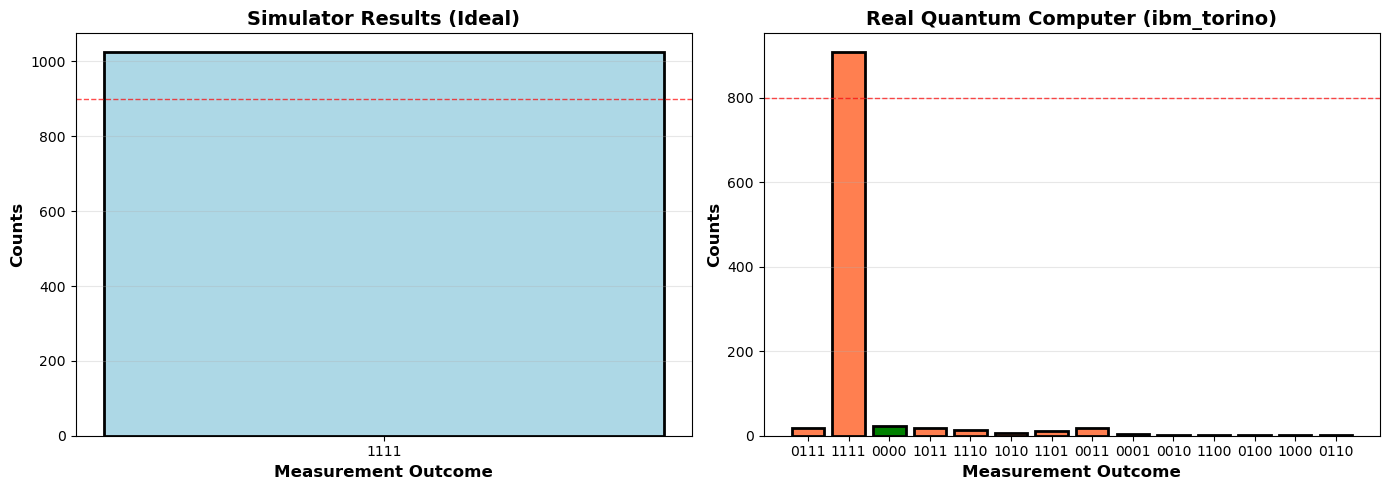

In [16]:
# Deutsch-Jozsa Algorithm
#목표 : f(x)가 constant(항상 0 또는 1) 또는 balaced(절반 0, 절반 1)인지 판별

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
import matplotlib.pyplot as plt


service = QiskitRuntimeService(
    channel = 'ibm_quantum_platform',
    token = '')

# 오라클 함수 정의
def deutsch_jozsa_oracle(qc, n , oracle_type='balanced', pattern='last'):
    """
    양자 오라클 구현

    Parameters:
    qc : QuantumCircuit
    n : int
    oracle_type : str
        'constant_0' : 항상 0 반환 (아무것도 안 함)
        'constant_1' : 항상 1 반환 (출력 큐비트만 반전)
        'balanced' : 절반만 1 반환 (CNOT 사용)
    """
    if oracle_type == 'constant_0':
        # Identity
        pass

    elif oracle_type == 'balanced':
        # xor 
        for i in range(n) :
            qc.cx(i, n)
    qc.barrier()

# Deutsch-Jozsa 회로 생성

n_qubits = 4

qc = QuantumCircuit(n_qubits + 1, n_qubits)

print("="*70)
print("Deutsch-Jozsa Algorithm - 3 큐비트")
print("="*70)
print(f"입력 공간 크기: 2^{n_qubits} = {2**n_qubits}가지")
print(f"고전 컴퓨터 최악: {2**(n_qubits-1) + 1}번 호출 필요")
print(f"양자 컴퓨터: 1번 호출로 해결!")
print("=" * 70)


#회로 구성

#초기화 : 출력 큐비트를 |1> 상태로
qc.x(n_qubits)
qc.barrier()

# 모든 큐비트에 hadamard 게이트 적용(중첩 상태 생성)
for i in range(n_qubits + 1):
    qc.h(i)
qc.barrier()

#오라클 적용
print("\n Oracel 타입 선택:")
print("   - 'constant_0': 항상 0 반환")
print("   - 'constant_1': 항상 1 반환")
print("   - 'balanced': 절반은 0, 절반은 1")

oracle_type = 'balanced'
print(f"\n Oracle: {oracle_type}")

deutsch_jozsa_oracle(qc, n_qubits, oracle_type=oracle_type)

# 입력 큐비트에 다시 hadamard(간섭 패턴 생성)
for i in range(n_qubits):
    qc.h(i)
qc.barrier()

#측정(입력 큐비트만)
qc.measure(range(n_qubits), range(n_qubits))

print("\n" + "=" * 70)
print("생성된 양자 회로:")
print("=" * 70)
print(qc.draw(output='text', fold=-1))

# 시뮬레이터에서 먼저 테스트
print("\n" + "="*70)
print("시뮬")
print("="*70)

from qiskit_aer import AerSimulator
simulator = AerSimulator()

transpiled_sim = transpile(qc, simulator)
job_sim = simulator.run(transpiled_sim, shots =1024)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts()

print(f"시뮬레이터 결과: {counts_sim}")

#실제 양자컴퓨터에서 실행
print("\n" + "="*70)
print(" 실제 실행")
print("="*70)

backend = service.least_busy(operational=True, simulator=False, min_num_qubits=4)
print(f"선택된 백엔드 : {backend.name}")
print(f" 큐비트 수: {backend.num_qubits}")
print(f" 대기 작업 : {backend.status().pending_jobs}")

transpiled = transpile(qc, backend, optimization_level=3)
print(f"\n 최적화 결과:")
print(f"원본 게이트 수:{qc.size()}")
print(f"최적화 후: {transpiled.size()}")
print(f"회로깊이: {transpiled.depth()}")

#sampler
sampler = SamplerV2(backend)
job = sampler.run([transpiled], shots=1024)

print(f" job id: {job.job_id()}")
print(f" 상태: {job.status()}")

result = job.result()

data_keys = list(result[0].data.__dict__.keys())
measurement_key = data_keys[0] if data_keys else 'c'
counts_real = getattr(result[0].data, measurement_key).get_counts()

print(f"\n 실제 양자컴 결과: {counts_real}")

# 결과 분석
print("\n" + "="*70)
print("=" * 70)

all_zeros = '0'*n_qubits #'000'

#판정
print(f"\n 시뮬레이터:")
if all_zeros in counts_sim and counts_sim.get(all_zeros, 0) > 900:
    print(f" 판정 : constant function")
    print(f" _> '{all_zeros}' 측정 빈도 : {counts_sim.get(all_zeros, 0)}/1024")
else : 
    print(f" 판정 : balanced function")
    print(f" -> '{all_zeros}' 아닌 값들이 측정됨")

# 실제 양자컴 판정
print(f"\n 실제 양자컴퓨터 : ")
zeros_count = counts_real.get(all_zeros, 0)
if zeros_count > 800 : # 노이즈 고려해서 임계값 낮춤
    print(f" 판정 : constant function")
    print(f" -> '{all_zeros}' 측정 빈도: {zeros_count}/1024 ({zeros_count/1024*100:.1f}%)")
else:
    print(f" 판정 balaced function")
    print(f" '{all_zeros}' 측정 빈도: {zeros_count}/1024 ({zeros_count/1024*100:.1f}%)")
    print(f" -> 다른 비트 패턴들이 균등하게 분포!")

# 양자 우위 계산
classical_queries = 2**(n_qubits-1) + 1
print(f" 고전 컴퓨터: 최악 {classical_queries}번 함수 호출")
print(f" 양자 컴퓨터 : 1번 호출로 해결!")
print(f" -> {classical_queries}배 빠름!")

#결과 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 시뮬 결과
states_sim = list(counts_sim.keys())
values_sim = list(counts_sim.values())
colors_sim = ['green' if s == all_zeros else 'lightblue' for s in states_sim]

axes[0].bar(states_sim, values_sim, color=colors_sim, edgecolor='black', linewidth=2)
axes[0].set_xlabel('Measurement Outcome', fontsize=12, weight='bold')
axes[0].set_ylabel('Counts', fontsize=12, weight='bold')
axes[0].set_title('Simulator Results (Ideal)', fontsize= 14, weight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=900, color='red', linestyle= '--', linewidth=1, alpha =0.7)

#실제 양자컴 결과
states_real = list(counts_real.keys())
values_real = list(counts_real.values())
colors_real = ['green' if s == all_zeros else 'coral' for s in states_real]

axes[1].bar(states_real, values_real, color=colors_real, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Measurement Outcome', fontsize =12, weight='bold')
axes[1].set_ylabel('Counts', fontsize=12, weight='bold')
axes[1].set_title(f'Real Quantum Computer ({backend.name})', fontsize=14, weight='bold')
axes[1].grid(axis ='y', alpha=0.3)
axes[1].axhline(y=800, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.savefig('deutsch_josa_results.png', dpi=150, bbox_inches='tight')